# Проверка гипотез по увеличению выручки интернет-магазина


В нашем распоряжении данные по 9 гипотезам, которые были разработаны совместно с отделом продаж крупного интернет-магазина и направлены на увеличение выручки, которую приносит магазин. А также два файла с результатами проведенного A/B теста. 

**ЦЕЛИ ИССЛЕДОВАНИЯ**<br>
1. Приоритизация указанных 9 гипотез.
2. Анализ результатов A/B теста и принятие решения остановить (приняв различие исследуемых групп или нет) или продолжить тест.

**Практическая значимость**<br>
Правильная приоритизация гипотез поможет сосредоточиться на проверке действительно значимых, весомых изменений и нововведений таких как открытие новых каналов привлечения, изменения в логистике, дизайне и навигации по сайту. В свою очередь, анализ результатов A/B теста подскажет в каком направлении и как развивать продукт, какие изменения приведут к росту измеряемых метрик (конверсии и среднего чека) и соответственно к увеличению прибыли.

**Ход исследования**<br>
Исследование будет состоять из двух частей:
Часть 1. **Приоритизация гипотез.** На этом этапе отсортируем гипотезы по убыванию приоритета используя фреймворк ICE. Затем применим фреймворк RICE и снова отсортируем гипотезы по убыванию приоритета. Рассмотрим различия (если есть) в порядке следования гипотез в этих двух сортировках. Опишем причины (различий или сходства) и сделаем соответствующие выводы.

Часть 2. **Анализ А/В теста.** Мы провели А/В тест, мы располагаем его результатами. <BR>
Выполним анализ результатов, произведем соответствующие расчеты, построим графики и сделаем выводы по след пунктам:
1. Кумулятивная выручка по группам.
2. Кумулятивный средний чек по группам.
3. Относительное изменение кумулятивного среднего чека группы B к группе A.
4. Кумулятивная конверсия по группам. 
5. Относительное изменение кумулятивной конверсии группы B к группе A.
6. Количество заказов по пользователям, с расчетом 95-ого и 99-ого перцентилей количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
7. Стоимость заказов, с расчетом 95-ого и 99-ого перцентилей стоимости заказов. Выберем границу для определения аномальных заказов.

Проверим гипотезы о существовании статистической значимости:
1. Различий в конверсии между группами по «сырым» данным.
2. Различий в среднем чеке заказа между группами по «сырым» данным.
3. Различий в конверсии между группами по «очищенным» данным.
4. Различий в среднем чеке заказа между группами по «очищенным» данным. 

Примем решение остановить тест, зафиксировать победу одной из групп или зафиксировать отсутствие различий между группами и сделаем соответствующие выводы. Или, если таковы будут результаты анализа, продолжим тест.

## 1. Приоритизация гипотез

Используем фреймфорки ICE и RICE для приоритизации гипотез

In [1]:
import pandas as pd
import scipy
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
    hypotes = pd.read_csv('hypothesis.csv')
except:
    hypotes = pd.read_csv('/datasets/hypothesis.csv')

# ознакомимся с датасетом hypotes
pd.options.display.max_colwidth = 1
display(hypotes)


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Согласно документации к данным:
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение `Efforts`, тем дороже проверка гипотезы.

In [3]:
# выведем отдельно названия гипотез полностью
hypotes['Hypothesis'].tolist()

['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
 'Запустить собственную службу доставки, что сократит срок доставки заказов',
 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
 'Запустить акцию, дающую скидку на товар в день рождения']

Отметим, что среди 9 гипотез есть три (2, 3 и 6), в которых конкретно сформулировано "улучшение" (блоки рекомендации товара, структура категорий, баннер с акциями и распродажами на главной странице) влияющее на конверсию и средний чек заказа. В 0, 4 и 5  гипотезах "улучшения" направленные на увеличение количества привлеченных пользователей, уровня их вовлеченности и количества заказов. В гипотезах 1, 7 и 8 не сформулированы в явном виде метрики, которые хотят улучшить за счет указанного нововведения (собственная доставка, форма подписки, акция на день рождения, в утвержениях 7 и 8 есть условие, указано улучшение, но нет заключения, следовательно не понятно, какую метрику надо исследовать, чтобы принять или отвергнуть гипотезу). Однако гипотезе 1 хотя бы говорится о предполагаемом сокращении времени доставки.

In [4]:
# лоурезируем названия столбцов для удобства
hypotes.columns = hypotes.columns.str.lower()
hypotes.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Применим фреймворк ICE к датасету `hypotes`, добавим соответствующий столбец `ICE` к нему и визуализируем результаты

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


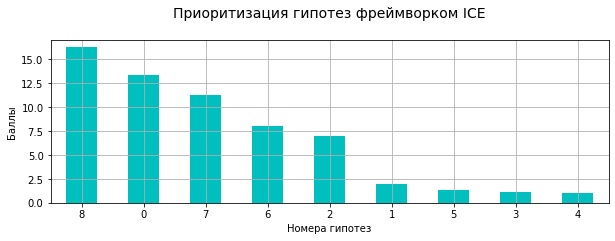

In [5]:
hypotes['ICE'] = (hypotes['impact'] * hypotes['confidence']) / hypotes['efforts']
display(hypotes[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

# построим стобчатую диаграмму 
hypotes.sort_values(by='ICE', ascending=False).plot(y='ICE', kind='bar', figsize=(10, 3), legend=False, color='c')
plt.title(label='Приоритизация гипотез фреймворком ICE\n', fontsize=14)
plt.xlabel("Номера гипотез", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel("Баллы", fontsize=10)
plt.grid()
plt.show()

Готово. Заметим, что на первом месте 8 "гипотеза". На втором и третьем гипотезы 0 и 7. Далее, с отстованием почти вдвое идет гипотеза 6 и 2. На последнем месте группа из четырех гипотез (1, 5, 3 и 4).

Применим фреймворк RICE к датасету `hypotes`, добавим соответствующий столбец `RICE` к нему и визуализируем результаты

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


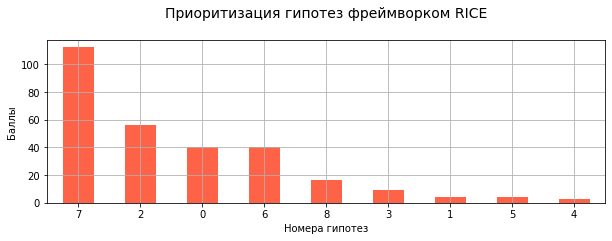

In [6]:
hypotes['RICE'] = (hypotes['reach'] * hypotes['impact'] * hypotes['confidence']) / hypotes['efforts']
display(hypotes[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

# построим столбчатую диаграмму
hypotes.sort_values(by='RICE', ascending=False).plot(y='RICE', kind='bar', figsize=(10, 3), legend=False, color='tomato')
plt.title(label='Приоритизация гипотез фреймворком RICE\n', fontsize=14)
plt.xlabel("Номера гипотез", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel("Баллы", fontsize=10)
plt.grid()
plt.show()

Отметим, что места, которые занимали гипотезы в приоритизированном списке изменились. На первое место вышла гипотеза 7. Далее гипотеза 2, которая набрала примерно в два раза меньше баллов чем седьмая. Третье место разделили гипотезы 0 и 6 с одинаковым количеством баллов. И только на 4 месте теперь "гипотеза" 8. Последние четыре места занимают гипотезы 3, 1, 5 и 4 (после приоритизации ICE этиже гипотезы были в конце списка только в другом порядке).

Выведем названия гипотез и столбцы `ICE` и `RICE` таблицы`hypotes` 

In [7]:
display(hypotes.sort_values(by='reach', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


**ВЫВОД**<br>
Для приоритизации гипотез мы использовали фреймворки ICE и RICE с параметрами Reach, Impact, Confidence и Efforts, которые были распределены между гипотезами по десятибальной шкале. 

В топ три по "версии ICE" вошли 8, 0, 7. Здесь мы не учитывали `Reach`- охват пользователей. 

В топ три по "версии RICE" попали гипотезы под номерами 7, 2, 6 и 0. В ходе приоритизации фреймворком RICE мы учитывали параметр `Reach`. Можно сказать, что баллы при расчете RICE получены умножением баллов ICE на `Reach`. Поэтому на первое место вышли гипотезы с большим значением этого параметра (ну и конечно меньшим значением  `efforts`). По этой причине из топ-3 пропала гипотеза 8 (с охватом пользователей 1) и попали гипотезы 2 и 6.



## 2. Анализ A/B теста

Загрузим датафрейм результатов A/B теста.

In [8]:
try:
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
except:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
    
display(orders.head(), visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Согласно документации к данным:

Таблица `orders`
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Таблица `visitors`
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [9]:
# выведем количество дубликатов в orders и visitors

print('Количество дубликатов в visitors и orders:', visitors.duplicated().sum(), "и", orders.duplicated().sum())

Количество дубликатов в visitors и orders: 0 и 0


Выведем информацию о количестве строк, типах данных и пропусков датафреймов visitors и orders

In [10]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Заметили тип object у столбцов с датами. Приведим их к типу datetime64.

In [11]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Готово. Теперь создадим датафреймы с пользователями групп А и В отдельно.

In [12]:
# отберем пользователей группы А
order_by_us_a = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
order_by_us_a.columns = ['userId', 'orders']

# отберем пользователей группы В
order_by_us_b = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
order_by_us_b.columns = ['userId', 'orders']

display(order_by_us_a.sample(5), order_by_us_b.sample(5))

,userId,orders
86,803709563,1
98,888420622,1
44,381340408,1
401,3301980586,1
405,3353177029,1


,userId,orders
226,1634934899,1
191,1397211727,1
425,3062605572,1
345,2476105225,1
143,993094131,1


Проверим нет ли пользователей, которые попали в обе группы. Объединим созданные датафреймы order_by_us_a и order_by_us_b по `userId` с помощью `merge` (по умолчанию inner) и получим таблицу, в которой пользователи из обеих групп, если таковые есть.

In [13]:
# датафрейм с id и количеством заказов пользователей, которые оказались в двух группах одновременно
ab_users = order_by_us_a.merge(order_by_us_b, on='userId') 

display(ab_users.sort_values(by=['orders_x', 'orders_y'], ascending=False).head(7))

print('Всего пользователей оказавшихся в обеих группах:', ab_users.shape[0])

,userId,orders_x,orders_y
56,4256040402,7,4
27,2458001652,5,6
24,2038680547,5,3
26,2378935119,4,5
1,199603092,4,1
3,237748145,4,1
12,1230306981,3,2


Всего пользователей оказавшихся в обеих группах: 58


Предположение подтвердилось, действительно такие пользователи есть, и их 58. Всего около 6% от общго количества уникальных пользователей. Смело можем убрать.

In [14]:
# id этих пользователей списком
us = ab_users['userId'].to_list()

# очистим датафреймы orders, order_by_us_a и order_by_us_b от таких пользователей
orders = orders[np.logical_not(orders['visitorId'].isin(us))]
order_by_us_a = order_by_us_a[np.logical_not(order_by_us_a['userId'].isin(us))]
order_by_us_b = order_by_us_b[np.logical_not(order_by_us_b['userId'].isin(us))]

**ВЫВОДЫ** <br>
Загрузили данные. Ознакомились, проверили на дубликаты и пропуски. Пропусков и явных дубликатов в данных нет. Привели столбцы с датой к нужному формату, формат остальных столбцов нас устраивает. Сгрупировали пользователей по группам в отдельные датафреймы и проверили наличие пользователей попавших в обе группы. Обнаружили их (6% от числа всех) и удалили из групп А и В.

### 2.1 Кумулятивная выручка по группам

Рассчитаем кумулятивную выручку по группам. Для этого получим агрегированне, кумулятивные данные о заказах, о посетителях интернет-магазина и объединим их в один датафрейм cumulat_dt.

In [15]:
# создаем массив уникальных пар значений дат и групп теста
dt_group = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_agg = (
dt_group
    .apply(lambda x: 
           orders[np.logical_and(orders['date'] <= x['date'],
                                              orders['group'] == x['group'])]
    .agg
              ({
           'date' : 'max',
           'group' : 'max',
           'transactionId' : 'nunique',
           'visitorId' : 'nunique',
           'revenue' : 'sum'
              }),
              axis=1).sort_values(by=['date','group'])
)

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_agg = (
dt_group
    .apply(lambda x: 
           visitors[np.logical_and(visitors['date'] <= x['date'], 
                                         visitors['group'] == x['group'])]
    .agg
              ({
                  'date' : 'max',
                  'group' : 'max',
                  'visitors' : 'sum'
              }),
              axis=1).sort_values(by=['date','group'])
)

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulat_dt = (
orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])
)

cumulat_dt.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulat_dt.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Готово. Теперь разобьем его на две части по группам А и В. И построим графики кумулятивной выручки по датам в каждой группе в одной системе координат.

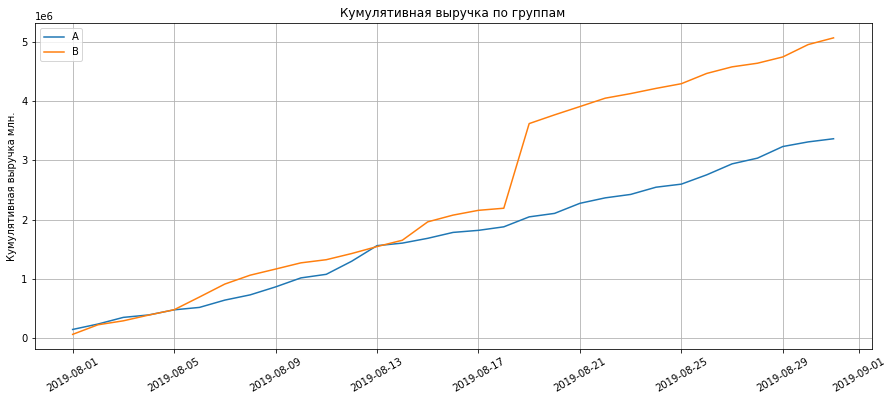

In [16]:

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
c_revenue_A = cumulat_dt[cumulat_dt['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
c_revenue_B = cumulat_dt[cumulat_dt['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(15, 6))
plt.plot(c_revenue_A['date'], c_revenue_A['revenue'], label='A')

# Строим график выручки группы B
plt.plot(c_revenue_B['date'], c_revenue_B['revenue'], label='B')
plt.grid()
plt.xticks(rotation = 30)
plt.title('Кумулятивная выручка по группам')
plt.ylabel('Кумулятивная выручка млн.')
plt.legend()
plt.show()


**ВЫВОДЫ**<br>
Из графика мы видим, что до 5.08 разницы в кумулятивной выручке практически нет, далее с 5.08 по 13.08 группа В вырывается немного вперед и к 13.08 группы снова сравниваются по накопленной выручке. После 13.08 группа В начинает опережать группу А, и с 17.08  по 19.08 происходи скачек примерно в 1.5 млн. и далее графики демонструруют схожие изменения. Т.е. в группе В в период с 17.08 по 19.08 покупательная активность пользователей резко выросла, возможно были какие-то очень крупные заказы. И далее кумулятивная выручка в группе В примерно на 1.5 млн. стабильно больше аналогичной в группе А. 

### 2.2 Кумулятивный средний чек по группам

Построим графики кумулятивных средних чеков по группам

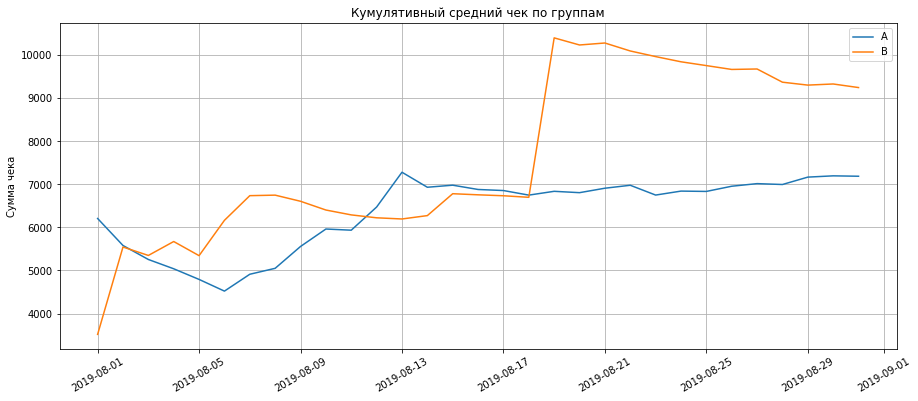

In [17]:
plt.figure(figsize=(15, 6))
plt.plot(c_revenue_A['date'], c_revenue_A['revenue']/c_revenue_A['orders'], label='A')
plt.plot(c_revenue_B['date'], c_revenue_B['revenue']/c_revenue_B['orders'], label='B')

plt.grid()
plt.xticks(rotation = 30)
plt.title('Кумулятивный средний чек по группам')
plt.ylabel('Сумма чека')
plt.legend()
plt.show()

**ВЫВОДЫ**<br>
Аналогично кумулятивной выручке, графики кумулятивных средних чеков ведут себя похожим образом. В начале заметно расождение в течение первых пяти, шести дней. В группе В рост успел смениться спадом, в группе А был постоянный спад. К 6.08 разница в кумулятивном среднем чеке составила более 1.5 тыс. К 15.08 группы сравнялись по кумулятивному среднему чеку на уровне 7000. Далее (как и в случае с кумулятивной выручкой) отмечаем резкий скачек примерно 18.08 который позволили кумулятивному среднему чеку в группе В за примерно два дня вырости почти в полтора раза. Значит действительно могли быть крупные заказы в этот преоид времени.   

### 2.3 Относительное изменение кумулятивного среднего чека группы B к группе A

Рассчитаем относительное изменение кумулятивного среднего чека группы В к группе А и построим соответствующий график.

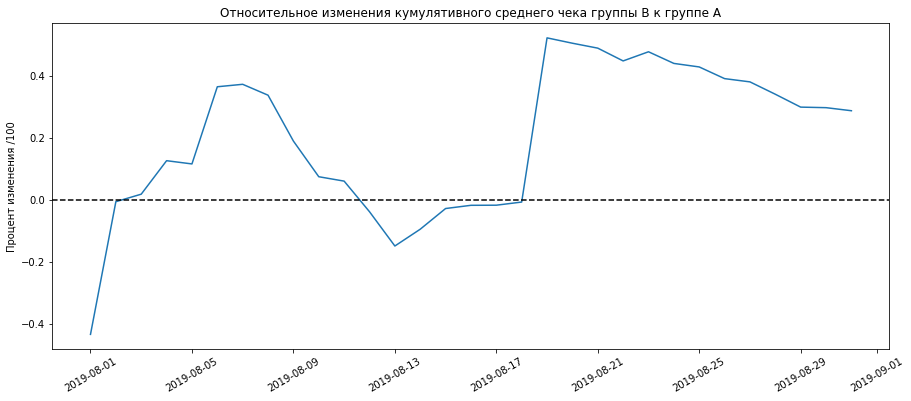

In [18]:
# собираем данные в одном датафрейме
mrg_cmlt_rev = c_revenue_A.merge(c_revenue_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15, 6))
plt.plot(mrg_cmlt_rev['date'], (mrg_cmlt_rev['revenueB']/mrg_cmlt_rev['ordersB'])/(mrg_cmlt_rev['revenueA']/mrg_cmlt_rev['ordersA'])-1)

# добавляем ось X

plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation = 30)
plt.title('Относительное изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Процент изменения /100')
plt.show()

**ВЫВОДЫ**<br>
Замечаем, что график относительного изменения кумулятивного среднего чека В к А сильно меняется. Особенно в начале исследования, далее с 9.08 по 13.08 и с 17.08 по 21.08. Что подтверждает наличие выбросов, больших заказов.

### 2.4 Кумулятивная конверсия по группам

Рассчитаем кумулятивную конверсию по группам и построим соответствующие графики

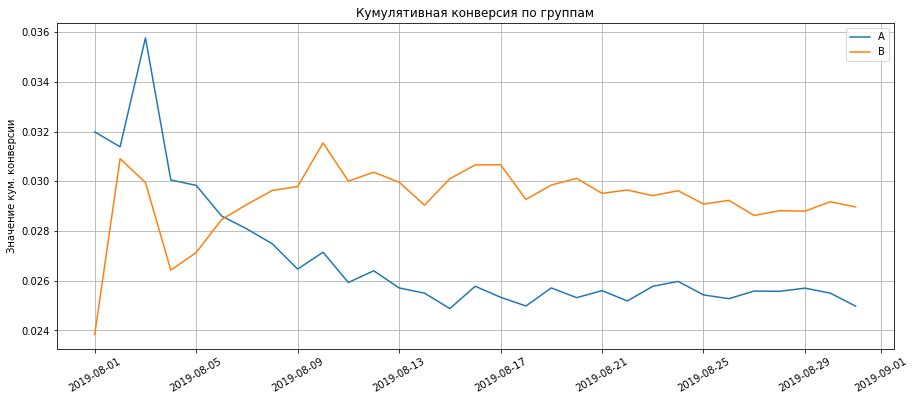

In [19]:
# считаем кумулятивную конверсию
cumulat_dt['conversion'] = cumulat_dt['orders']/cumulat_dt['visitors']

# отделяем данные по группе A и B
cmlt_dt_a = cumulat_dt[cumulat_dt['group']=='A']
cmlt_dt_b = cumulat_dt[cumulat_dt['group']=='B']

# строим графики
plt.figure(figsize=(15, 6))
plt.plot(cmlt_dt_a['date'], cmlt_dt_a['conversion'], label='A')
plt.plot(cmlt_dt_b['date'], cmlt_dt_b['conversion'], label='B')
plt.legend()
plt.grid()
plt.xticks(rotation = 30)
plt.title('Кумулятивная конверсия по группам')
plt.ylabel('Значение кум. конверсии')
plt.show()

**ВЫВОДЫ**<br>
Видим, что кумулятивная конверсия сильно колебалась первые пять дней, затем на момент 9.08 совпала в группах А и В. Далее конверсия в группе В стабильно демонстрирует значения выше чем в группе А. При этом изменения кумулятивной конверсии по группам близки к симметричным.

### 2.5 Относительное изменения кумулятивной конверсии группы B к A

Рассчитаем относительное изменение кумулятивной конверсии группы В к группе А и построим соответствующий график

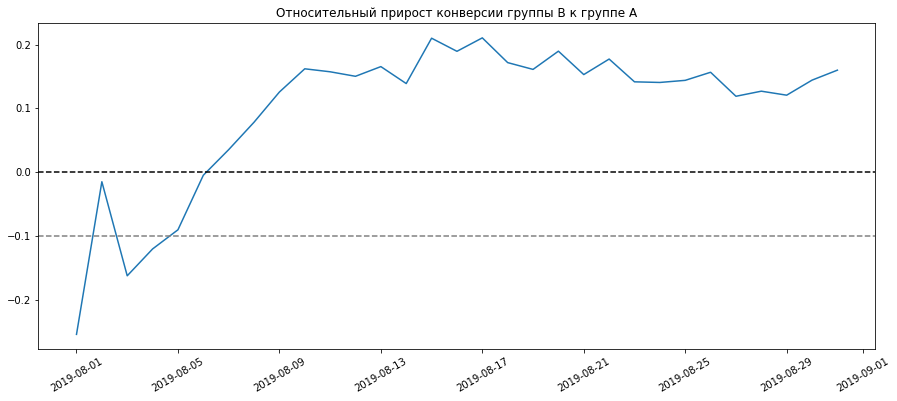

In [20]:
# создадим соответствующий датафрейм объединяя ранее созданные датафреймы по date и conversion
merge_cmlt_convers = (
cmlt_dt_a[['date','conversion']]
.merge(cmlt_dt_b[['date','conversion']], 
       left_on='date', 
       right_on='date', 
       how='left',
       suffixes=['A', 'B'])
)
plt.figure(figsize=(15, 6))
plt.plot(merge_cmlt_convers['date'], merge_cmlt_convers['conversionB']/merge_cmlt_convers['conversionA']-1)
plt.title("Относительный прирост конверсии группы B к группе A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xticks(rotation = 30)
plt.show()

**ВЫВОДЫ**<br>
Замечаем, что группы А и В сравнялись только на пятый - шестой день. До этого группа В в основном уступала А. После 6.08 группа В превосходит А, причем превосходство достигало 20%. В целом можно сказать, что преимущество группы В итоге установилось и вышло на уровень 10-15%. Однако будем иметь ввиду, что перед нами "сырые" данные. Очистим данные от выбросов и аномальных значений и только после этого будем делать окончательные выводы.

### 2.6 Количество заказов по пользователям

In [21]:
# создадим соответствующий датафрейм
orders_by_users = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

orders_by_users.columns = ['userId', 'orders']

display(orders_by_users.sort_values(by='orders', ascending=False).head(50))

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Отметим, что есть пользователи и с 8, 9 и даже 11 заказами. Но все это единичные случаи. Даже пользователей с 4 и 5 заказами сравнительно мало. 

Построим точечный график количества заказов по пользователям

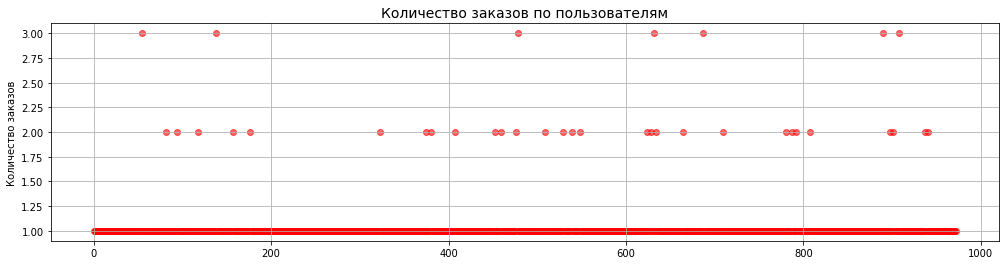

In [22]:
x_values = pd.Series(range(0, len(orders_by_users)))

plt.figure(figsize=(17, 4))
plt.scatter(x_values, orders_by_users['orders'], alpha=0.6, color='red')
plt.grid()
plt.title('Количество заказов по пользователям', fontsize=14)
plt.ylabel('Количество заказов')
plt.show()

Диаграмма подтверждает ранее отмеченное. Вот они отдельные пользователи, которые имеют по 5, 8, 9 и даже 11. Наобольшее число пользователем, что вполне естественно с одним, двумя заказами, с тремя уже сильно меньше.

#### 2.6.1 Расчет 95-ого и 99-ого перцентилей количества заказов на пользователя

Рассчитаем 95-ый и 99-ый перцентили количества заказов на пользователя

In [23]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[1. 2.]


**ВЫВОДЫ**<br>
Не более 5% пользователей имеют больше чем 2 заказа и лишь 1% больше чем 4. Видится целесообразным установить верхнюю границу в 2 заказа, и отбросить остальные.

### 2.7 Стоимость заказов

Построим диаграмму рассеиния стоимости заказов по пользователям.

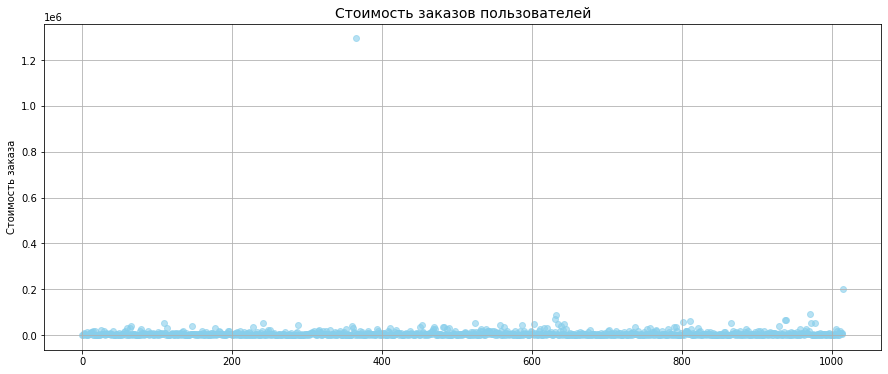

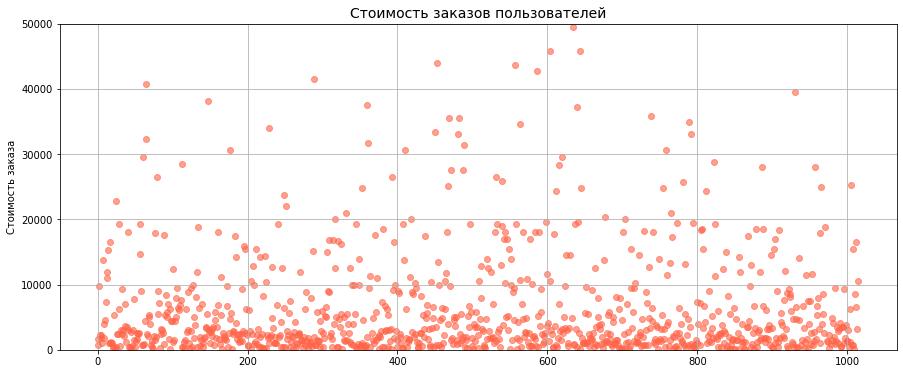

,revenue,visitorId
425,1294500,1920142716
1196,202740,2108080724
1136,92550,1307669133
744,86620,888512513
743,67990,4133034833
1103,66350,1164614297
1099,65710,148427295
949,60450,887908475
940,58550,4003628586
131,53904,2254586615


In [24]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15, 6))
plt.scatter(x_values, orders['revenue'], color= "skyblue", alpha=0.6) 
plt.grid()
plt.title('Стоимость заказов пользователей', fontsize=14)
plt.ylabel('Стоимость заказа')
plt.show()


plt.figure(figsize=(15, 6))
plt.scatter(x_values, orders['revenue'], color= "tomato", alpha=0.6) 
plt.grid()
plt.title('Стоимость заказов пользователей', fontsize=14)
plt.ylabel('Стоимость заказа')
plt.ylim(0, 50000)
plt.show()

display(orders[['revenue', 'visitorId']].sort_values(by='revenue', ascending=False).head(15))

Заметим отдельного пользователя оформившего заказ на 1294500 и еще одного с заказом в 202740. Далее отметим, что большинство заказов не дотягивает и до 100тыс. и большая их часть, по грубой оценке сосредоточена между 0 и 50 тыс.

#### 2.7.1 95-й и 99-й перцентили стоимости заказов

Рассчитаем 95-ый и 99-ый перцентили стоимости заказов

In [25]:
print(np.percentile(orders['revenue'], [95,99]))

[26785. 53904.]


**ВЫВОДЫ**<br>
Заметим, что не более 5% пользователей оформляли заказы на стоимость более 28 тыс, не более 1% на 58 тыс. Представляется разумным установить верхний порог в 28 тыс.

### 2.8 Проверка гипотез

Сперва рассмотрим различия в конверсии и среднем чеке между группами А и В по сырым данным (мы уже проверили их на дубликаты, но ранее отметили аномальных пользователей и установили соответствующие верхние границы стоимости заказа и количества заказов).

#### 2.8.1 Различия в конверсии между группами по «сырым» данным 

Готово. Теперь можем перейти к созданию соответствующих объектов данных для поверки гипотез 

In [26]:
# Создадим два `Series` объекта `samp_а` и `samp_b`
# в них пользователям из групп A и B будет соответствовать количество заказов (тем, кто ничего не заказал, запишем нули)

samp_a = (
pd.concat([order_by_us_a['orders'],
        pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() 
                                     - len(order_by_us_a['orders'])), 
                  name='orders')], axis=0)
)

samp_b = (
pd.concat([order_by_us_b['orders'],
        pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() 
                                     - len(order_by_us_b['orders'])), 
                  name='orders')], axis=0)
)

display(samp_a.sample(5), samp_b.sample(5))

11218    0
8493     0
17018    0
4430     0
3723     0
Name: orders, dtype: int64

14117    0
10584    0
8388     0
8577     0
4129     0
Name: orders, dtype: int64

Используем критерий **Шапиро-Уилк** для проверки распределения на нормальность 

In [27]:
stat, p = scipy.stats.shapiro(samp_a) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности распределения количества заказов в группе А')
else:
    print('Отклонить гипотезу о нормальности распределения количества заказов в группе А')
    
stat, p = scipy.stats.shapiro(samp_b)
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности распределения количества заказов в группе B')
else:
    print('Отклонить гипотезу о нормальности распределения количества заказов в группе B')

Statistics=0.133, p-value=0.000
Отклонить гипотезу о нормальности распределения количества заказов в группе А
Statistics=0.151, p-value=0.000
Отклонить гипотезу о нормальности распределения количества заказов в группе B


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Выходит, что распределение количества заказов по группам не является нормальным, а значит для проверки гипотез стоит применить непараметрический U-тест Манна-Уитни.

**Сформулируем две гипотезы**

Нулевая (Н0) - различий в конверсии между исследуемыми группами по "сырым" данным нет

Альтернативная (Н1) - различия в конверсии между исследуемыми группами по "сырым" данным есть

In [28]:
# расчет стат значимости различии в конверсии по "сырым" данным
print("{0:.3f}".format(stats.mannwhitneyu(samp_a, samp_b)[1]))

# расчет относительного различия в средней конверсии группы В к А
print("{0:.2f}".format(samp_b.mean() / samp_a.mean() - 1))

0.011
0.16


p-value = 0.011, что меньше 0.05, а значит мы отвергаем нулевую гипотезу, и статистически значимые различия в конверсии между группами по "сырым" данным есть. При этом судя по результатам расчета относительного различия в среднем значении конверсии, группа В выигрывает 16% у группы А.

#### 2.8.2 Различия в среднем чеке между группами по «сырым» данным 

Используем аналогично предыдущему пункту U-тест Манна-Уитни

**Сформулируем две гипотезы**

Нулевая (Н0) - различий в среднем чеке между исследуемыми группами по "сырым" данным нет

Альтернативная (Н1) - различия в среднем чеке между исследуемыми группами по "сырым" данным есть

In [29]:
# статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.829
0.29


p-value = 0.829, что значительно превышает 0.05, а значит мы не можем отвергать нулевую гипотезу, и статистически значимых различий в среднем чеке между группами по "сырым" данным нет. При этом судя по результатам расчета относительного различия в среднего среди средних чеков, группа В выигрывает 29% у группы А.

#### 2.8.3 Различия в коверсии между группами по «очищенным» данным 

Ранее нами были установлены верхние границы количества заказов и стоимости заказов. А также выдвинуто предположение о том, что в данных А/В теста могут присутствовать пользователи одновременно попавшие и в группу А и в группу В. 

Готово. Теперь в order_by_us_a и order_by_us_b данные пользователей, которые изначально были только в одной из групп А или В.

Далее, очистим данные от пользователей не попавших в пределы установленные ранее по количеству и стоимости заказов.

In [30]:
usersWithManyOrders = pd.concat(
    [
        order_by_us_a[order_by_us_a['orders'] >= 3]['userId'],
        order_by_us_b[order_by_us_b['orders'] >= 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Количество пользователей с числом заказов и/или стоимостью заказов выше верхней границы:', abnormalUsers.shape[0])

# фильтруем данные
f_samp_a = (
pd.concat([order_by_us_a[np.logical_not(order_by_us_a['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() 
                                     - len(order_by_us_a['orders'])), name='orders')], axis=0)
)

f_samp_b = (
pd.concat([order_by_us_b[np.logical_not(order_by_us_b['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() 
                                     - len(order_by_us_b['orders'])), name='orders')], axis=0)
)

Количество пользователей с числом заказов и/или стоимостью заказов выше верхней границы: 55


Теперь можем заняться проверкой гипотез располагая уже "очищенными" данными. 

Нулевая (Н0) - различий в конверсии между исследуемыми группами по "очищенным" данным нет<br>
Альтернативная (Н1) - различия в конверсии между исследуемыми группами по "очищенным" данным есть

In [31]:
print("{0:.3f}".format(stats.mannwhitneyu(f_samp_a, f_samp_b)[1]))
print("{0:.2f}".format(f_samp_b.mean() / f_samp_a.mean() - 1))

0.009
0.19


p-value = 0.009, что меньше 0.05, а значит мы отвергаем нулевую гипотезу, и статистически значимые различия в конверсии между группами по "сырым" данным есть. При этом судя по результатам расчета относительного различия в среднем значении конверсии, группа В выигрывает 19% у группы А. Отметим, что после очистки данных p-value уменьшился с 0.011 до 0.09, а относительное различие увеличилось с 16% до 19%. Но в целом результаты прежние.

#### 2.8.4 Различия в среднем чеке между группами по «очищенным» данным

**Сформулируем две гипотезы**

Нулевая (Н0) - различий в среднем чеке между исследуемыми группами по "очищенным" данным нет

Альтернативная (Н1) - различия в среднем чеке между исследуемыми группами по "очищенным" данным есть

In [32]:
# статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

print('{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', 
      np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
          orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId']
            .isin(abnormalUsers)))]['revenue'])[1]))

# относительный прирост среднего чека очищенной группы B к А 
print("{0:.2f}".format(orders[np.logical_and(orders['group'] == 'B',
     np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId']
            .isin(abnormalUsers)))]['revenue'].mean() - 1))

0.762
-0.02


p-value = 0.762, что значительно превышает 0.05, а значит мы не можем отвергать нулевую гипотезу, и статистически значимых различий в среднем чеке между группами по "очищенным" данным нет. При этом судя по результатам расчета относительного различия в среднего среди средних чеков, группа В проигрывает 2% группе А. В сравнении с результатами по "сырым" данным p-value упал на 0.067, а относительное различие упало на 31% и стало в пользу А (хотя различие в 2% мало информативно). Не считая относительного различия, основные выводы снова не изменились.

## 3. Итого исследования

### 3.1 Итоги приоритизации гипотез

Приоритизировали гипотезы при помощи ICE и RICE с параметрами Reach, Impact, Confidence и Efforts, которые были распределены между гипотезами по десятибальной шкале.

В топ-3 по **"версии ICE"** вошли **8, 0, 7**. Здесь мы не учитывали Reach - охват пользователей.

В топ-3 по **"версии RICE"** попали гипотезы под номерами **7, 2, 6 и 0**. Получено с учетом Reach.

### 3.2 Итого анализа А/В теста

Мы провели анализ результатов А/В теста и вот что получили:

* Кумулятивная выручка в группе В выше чем в А, и в перспективе тенденция должна сохраняться (убедились на графике)
* Кумулятивный средний чек больше в группе В чем в А, и несмотря на небольшой спад за последние две недели, сохраняется ощутимый разрыв между В и А (следует из графика), что также подтверждает график относительного изменения кумулятивного среднего чека.
* Кумулятивная конверсия группы В превосходит А, видим тенденцию на сохранение этого тренда (из графика), и подтверждается графиком относительного изменения кумулятивной конверсии, на котором группа В уверенно лидирует с 15% преимуществом.
* Есть статистически значимое различие в конверсии между группами А и В, но нет статистически значимого различия в среднем чеке.

Учитывая перечисленное выше, рекомендуем **остановить тест и признать победу группы В над группой А**. Изменения, которые внесли в продукт могут способствовать повышению выручки и конверсии пользователей, что в свою очередь может принести дополнительную прибыль интернет-магазину.